<a href="https://colab.research.google.com/github/ayush-singh110/KindleReviewAnalysis/blob/main/KindleReviewAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install opendatasets
import kagglehub

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
!pip install beautifulsoup4
from bs4 import BeautifulSoup
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
path = kagglehub.dataset_download("meetnagadia/amazon-kindle-book-review-for-sentiment-analysis")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/amazon-kindle-book-review-for-sentiment-analysis


In [ ]:
#Preprocessing and Cleaning
#Train Test Split
#
#Train Ml algo

In [ ]:
import os
csv_file_path=os.path.join(path,'all_kindle_review .csv')
df=pd.read_csv(csv_file_path)
df.head()

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000


In [ ]:
df.drop(['Unnamed: 0.1','Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df=df[['reviewText','rating']]
df.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",3
1,Great short read. I didn't want to put it dow...,5
2,I'll start by saying this is the first of four...,3
3,Aggie is Angela Lansbury who carries pocketboo...,3
4,I did not expect this type of book to be in li...,4


In [ ]:
df.shape

(12000, 2)

In [ ]:
df.isnull().sum()

,0
reviewText,0
rating,0


In [ ]:
df['rating'].unique()

array([3, 5, 4, 2, 1])

In [ ]:
d=df['rating'].value_counts()

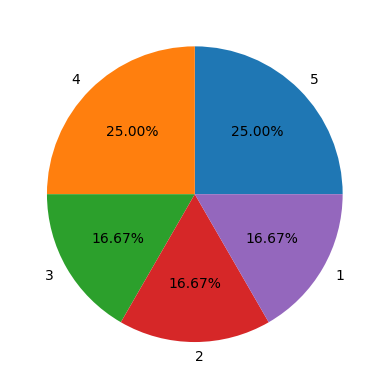

In [ ]:
plt.pie(d,labels=d.index,autopct='%1.2f%%')
plt.show()

In [ ]:
#Preprocessing and Cleaning

In [ ]:
#positive review is 1 and negative review is 0
df['rating']=df['rating'].apply(lambda x: 1 if x>3 else 0)

In [ ]:
df['rating'].unique()

array([0, 1])

In [ ]:
df.head()

,reviewText,rating
0,"Jace Rankin may be short, but he's nothing to ...",0
1,Great short read. I didn't want to put it dow...,1
2,I'll start by saying this is the first of four...,0
3,Aggie is Angela Lansbury who carries pocketboo...,0
4,I did not expect this type of book to be in li...,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  12000 non-null  object
 1   rating      12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [ ]:
df['rating'].value_counts()

,count
rating,
0,6000
1,6000


In [ ]:
##1.Lower all the cases
df['reviewText']=df['reviewText'].str.lower()

In [ ]:
df.head()

,reviewText,rating
0,"jace rankin may be short, but he's nothing to ...",0
1,great short read. i didn't want to put it dow...,1
2,i'll start by saying this is the first of four...,0
3,aggie is angela lansbury who carries pocketboo...,0
4,i did not expect this type of book to be in li...,1


In [ ]:
##Remove special characters
df['reviewText']=df['reviewText'].apply(lambda x: re.sub('[^a-z A-Z 0-9]+','',x))
##Remove stopwords
df['reviewText']=df['reviewText'].apply(lambda x:" ".join([y for y in x.split() if y not in set(stopwords.words('english'))]))
##Remove URLS
df['reviewText']=df['reviewText'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&/~+#-]*[\w@?^=%&/~+#])?','',str(x)))
##Remove html tags
df['reviewText']=df['reviewText'].apply(lambda x:BeautifulSoup(x,'lxml').get_text())
##Remove any additional spaces
df['reviewText']=df['reviewText'].apply(lambda x:" ".join(x.split()))

In [ ]:
df.head()

,reviewText,rating
0,jace rankin may short hes nothing mess man hau...,0
1,great short read didnt want put read one sitti...,1
2,ill start saying first four books wasnt expect...,0
3,aggie angela lansbury carries pocketbooks inst...,0
4,expect type book library pleased find price right,1


In [ ]:
#lemmatizer
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer=WordNetLemmatizer()

In [ ]:
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
df['reviewText']=df['reviewText'].apply(lambda x:lemmatize_words(x))

In [ ]:
df.head()

,reviewText,rating
0,jace rankin may short he nothing mess man haul...,0
1,great short read didnt want put read one sitti...,1
2,ill start saying first four book wasnt expecti...,0
3,aggie angela lansbury carry pocketbook instead...,0
4,expect type book library pleased find price right,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df['reviewText'],df['rating'],test_size=0.2,random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
#Using Bag of Words
bow=CountVectorizer()
X_train_bow=bow.fit_transform(X_train).toarray()
X_test_bow=bow.transform(X_test).toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model=GaussianNB()
nb_model.fit(X_train_bow,y_train)
y_pred=nb_model.predict(X_test_bow)

In [ ]:
print("accuracy for bow: ",accuracy_score(y_test,y_pred))
print("confusion matrix for bow: ",confusion_matrix(y_test,y_pred))
print("classification report for bow: ",classification_report(y_test,y_pred))

accuracy for bow:  0.5908333333333333
confusion matrix for bow:  [[907 283]
 [699 511]]
classification report for bow:                precision    recall  f1-score   support

           0       0.56      0.76      0.65      1190
           1       0.64      0.42      0.51      1210

    accuracy                           0.59      2400
   macro avg       0.60      0.59      0.58      2400
weighted avg       0.60      0.59      0.58      2400



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#Tfidf
tf=TfidfVectorizer()
X_train_tf=tf.fit_transform(X_train).toarray()
X_test_tf=tf.transform(X_test).toarray()

In [ ]:
nb_model1=GaussianNB()
nb_model1.fit(X_train_tf,y_train)
y_pred1=nb_model1.predict(X_test_tf)

In [ ]:
print("accuracy score for tfidf:",accuracy_score(y_test,y_pred1))
print("confusion matrix for tfidf:",confusion_matrix(y_test,y_pred1))
print("classification report for tfidf:",classification_report(y_test,y_pred1))

accuracy score for tfidf: 0.6295833333333334
confusion matrix for tfidf: [[794 396]
 [493 717]]
classification report for tfidf:               precision    recall  f1-score   support

           0       0.62      0.67      0.64      1190
           1       0.64      0.59      0.62      1210

    accuracy                           0.63      2400
   macro avg       0.63      0.63      0.63      2400
weighted avg       0.63      0.63      0.63      2400



In [ ]:
#using Word2Vec
!pip install gensim

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import gensim

In [ ]:
words=[]
for i in range(len(df)):
    sent_token=sent_tokenize(df['reviewText'][i])
    for j in sent_token:
        words.append(simple_preprocess(j))

In [ ]:
len(words)

12000

In [ ]:
model=gensim.models.Word2Vec(words)

In [ ]:
model.wv.index_to_key

['book',
 'story',
 'read',
 'one',
 'character',
 'like',
 'good',
 'would',
 'really',
 'love',
 'time',
 'get',
 'author',
 'reading',
 'series',
 'much',
 'first',
 'well',
 'even',
 'didnt',
 'short',
 'know',
 'way',
 'could',
 'great',
 'make',
 'sex',
 'little',
 'dont',
 'thing',
 'want',
 'two',
 'think',
 'find',
 'plot',
 'also',
 'romance',
 'end',
 'life',
 'im',
 'see',
 'enjoyed',
 'go',
 'scene',
 'never',
 'take',
 'woman',
 'many',
 'lot',
 'written',
 'kindle',
 'say',
 'work',
 'thought',
 'bit',
 'found',
 'year',
 'going',
 'give',
 'interesting',
 'liked',
 'writing',
 'novel',
 'loved',
 'another',
 'feel',
 'better',
 'got',
 'come',
 'man',
 'hot',
 'still',
 'enough',
 'back',
 'though',
 'people',
 'reader',
 'made',
 'star',
 'review',
 'something',
 'part',
 'friend',
 'cant',
 'page',
 'need',
 'bad',
 'keep',
 'new',
 'wasnt',
 'free',
 'world',
 'doesnt',
 'relationship',
 'enjoy',
 'recommend',
 'together',
 'next',
 'start',
 'felt',
 'best',
 'put',

In [ ]:
model.corpus_count

12000

In [ ]:
model.epochs

5

In [ ]:
!pip install tqdm

In [ ]:
import tqdm

In [ ]:
#implementing avg word2vec
def avg_word2vec(doc):
    # Filter out words not in the vocabulary
    words_in_vocab = [word for word in doc if word in model.wv.index_to_key]
    if not words_in_vocab:
        # Return a zero vector if no words in vocabulary
        return np.zeros(model.wv.vector_size)
    return np.mean([model.wv[word] for word in words_in_vocab], axis=0)

In [ ]:
X=[]
for i in tqdm.tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

100%|██████████| 12000/12000 [00:19<00:00, 630.63it/s]


In [ ]:
X1=np.array(X)

In [ ]:
df1=pd.DataFrame(X1)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.232676,0.287790,0.089722,0.094436,0.150170,-0.433919,0.052466,0.748933,-0.264898,-0.221535,...,0.466845,0.162209,-0.131281,0.109952,0.522142,0.254537,0.030553,-0.419652,0.059951,-0.111109
1,-0.185886,0.155617,-0.023194,0.157714,0.452555,-0.459566,0.315880,0.740705,-0.574164,-0.245328,...,0.751564,0.427576,0.016060,0.078576,0.495173,0.370310,0.158112,-0.368658,-0.197510,-0.059576
2,-0.295346,0.260335,0.132618,0.027217,0.314670,-0.470307,0.387079,0.743188,-0.358600,-0.317822,...,0.581242,0.235641,0.046739,0.030328,0.488038,0.421075,0.127833,-0.356324,-0.064111,-0.062605
3,-0.463578,0.228995,0.131309,0.170196,0.319605,-0.433859,0.317068,0.696339,-0.288168,-0.255490,...,0.337159,0.001123,0.078958,-0.129352,0.357458,0.449404,0.328576,-0.179501,-0.033696,-0.196556
4,0.126486,0.397670,-0.091815,-0.151833,-0.044194,-0.396075,0.420889,0.847446,-0.315456,-0.226648,...,0.505076,0.275685,0.409235,-0.056361,0.569351,0.364308,0.225869,-0.386771,-0.092989,-0.063904


In [ ]:
df1['rating']=df['rating']

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
model3=GaussianNB()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print('accuracy score for word2vec: ',accuracy_score(y_test,y_pred))
print('confusion matrix for word2vec:',confusion_matrix(y_test,y_pred))
print('classification report for word2vec:',classification_report(y_test,y_pred))

accuracy score for word2vec:  0.7303333333333333
confusion matrix for word2vec: [[1133  368]
 [ 441 1058]]
classification report for word2vec:               precision    recall  f1-score   support

           0       0.72      0.75      0.74      1501
           1       0.74      0.71      0.72      1499

    accuracy                           0.73      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.73      0.73      3000

